#From "Diagnosing Pneumonia from X-Ray Images Using Convolutional Neural Network"

###https://towardsdatascience.com/diagnosing-pneumonia-from-x-ray-images-using-convolutional-neural-network-fe9975cab808

In [106]:

# from cgi import test
# import os
# import glob
# import numpy as np

# base_dir = 'chest_xray/'

# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'val')
# test_dir = os.path.join(base_dir, 'test')

# train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
# train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

# validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
# validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')

# test_NORMAL_dir = os.path.join(test_dir, 'NORMAL')
# test_PNEUMONIA_dir = os.path.join(test_dir, 'PNEUMONIA')

# train_NORMAL_fnames = os.listdir(train_NORMAL_dir)
# train_PNEUMONIA_fnames = os.listdir(train_PNEUMONIA_dir)

# validation_NORMAL_fnames = os.listdir(validation_NORMAL_dir)
# validation_PNEUMONIA_fnames = os.listdir(validation_PNEUMONIA_dir)

# test_NORMAL_fnames = os.listdir(test_NORMAL_dir)
# test_PNEUMONIA_fnames = os.listdir(test_PNEUMONIA_dir)

# n_train = len(train_NORMAL_fnames) + len(train_PNEUMONIA_fnames)
# n_validation = len(validation_NORMAL_fnames) + len(validation_PNEUMONIA_fnames)
# n_test = len(test_NORMAL_fnames) + len(test_PNEUMONIA_fnames)

# print(n_train, n_validation, n_test)
# print(len(train_NORMAL_fnames),len(train_PNEUMONIA_fnames))
# print(len(test_NORMAL_fnames),len(test_PNEUMONIA_fnames))
# print(len(validation_NORMAL_fnames),len(validation_PNEUMONIA_fnames))

4696 578 582
1282 3414
155 427
146 432


In [94]:
# print(len(os.listdir(os.path.join(base_dir, 'all_data', 'NORMAL'))))
# print(len(os.listdir(os.path.join(base_dir, 'all_data', 'PNEUMONIA'))))

1583
4273


In [154]:

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(2,5, figsize=(30,10))
# for i in range(0,5):
#     img = plt.imread(os.path.join(train_NORMAL_dir, train_NORMAL_fnames[i]))
#     ax[0,i].imshow(img, cmap='gray')
#     ax[0,i].axis('off')
#     ax[0,i].set_title('Normal', fontsize=30)
    
# for i in range(0,5):
#     img = plt.imread(os.path.join(train_PNEUMONIA_dir, train_PNEUMONIA_fnames[i]))
#     ax[1,i].imshow(img, cmap='gray')
#     ax[1,i].axis('off')
#     ax[1,i].set_title('Pneumonia', fontsize=30)
    
# plt.show()

In [107]:
import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

In [130]:
base_dir = 'chest_xray/'
train_dir = base_dir+'train/'
test_dir = base_dir+'test/'
val_dir = base_dir+'val/'
im_size = 200
batch_size = 32

def dir_img_lab(dir):
    #fetch all the normal xray images and labels from given directory
    norm_img = glob.glob(dir+"NORMAL/*.jpeg")
    norm_labels = np.array(['normal']*len(norm_img))
    #fetch all the pneumonia xray images and labels from given directory
    pnm_img = glob.glob(dir+"PNEUMONIA/*.jpeg")
    pnm_labels = np.array(list(map(lambda x: x.split("_")[2],pnm_img)))
    return norm_img,norm_labels,pnm_img,pnm_labels
#get the normal and pneumonia images for training and testing
#and also get the labels
trn_norm_img,trn_norm_lab,trn_pnm_img,trn_pnm_lab= dir_img_lab(train_dir)
tst_norm_img,tst_norm_lab,tst_pnm_img,tst_pnm_lab= dir_img_lab(test_dir)
val_norm_img,val_norm_lab,val_pnm_img,val_pnm_lab= dir_img_lab(val_dir)

In [129]:
# val_pnm_lab

In [138]:
def get_x(files):
    #create a numpy array of the shape
    #(number of images, image size , image size, 1 for grayscale channel ayer)
    #this will be input for model
    train_x = np.zeros((len(files), im_size, im_size,1), dtype='float32')
    #iterate over img_file of given path
    for i, img_file in enumerate(files):
        #read the image file in a grayscale format and convert into numeric format
        #resize all images to one dimension i.e. 200x200
        img = cv2.resize(cv2.imread(img_file,cv2.IMREAD_GRAYSCALE),((im_size,im_size)))
        #reshape array to the train_x shape
        #1 for grayscale format
        img_array = np.expand_dims(np.array(img[...,::-1].astype(np.float32)).copy(), axis=0)
        train_x[i] = img_array.reshape(img_array.shape[1],img_array.shape[2],1)
    return train_x
#pass the normal and pneumonia images of training and testing sets
trn_norm_x = get_x(trn_norm_img)
trn_pnm_x = get_x(trn_pnm_img)
tst_norm_x = get_x(tst_norm_img)
tst_pnm_x = get_x(tst_pnm_img)
val_norm_x = get_x(val_norm_img)
val_pnm_x = get_x(val_pnm_img)

In [132]:
print("train normal array shape :",trn_norm_x.shape)
print("train pneumonia array shape :",trn_pnm_x.shape)
print("\ntest normal array shape :",tst_norm_x.shape)
print("test pneumonia array shape :",tst_pnm_x.shape)
print("\nval normal array shape :",val_norm_x.shape)
print("val pneumonia array shape :",val_pnm_x.shape)

train normal array shape : (1282, 200, 200, 1)
train pneumonia array shape : (3414, 200, 200, 1)

test normal array shape : (155, 200, 200, 1)
test pneumonia array shape : (427, 200, 200, 1)

val normal array shape : (146, 200, 200, 1)
val pneumonia array shape : (432, 200, 200, 1)


In [140]:
#append pneumonia array to normal array and
#append pneumonia labels to normal labels of training
x_train = np.append(trn_norm_x,trn_pnm_x,axis=0)
y_train = np.append(trn_norm_lab,trn_pnm_lab)
#above process for testing as well
x_test = np.append(tst_norm_x,tst_pnm_x,axis=0)
y_test = np.append(tst_norm_lab,tst_pnm_lab)
#above process for validation as well
x_val = np.append(val_norm_x,val_pnm_x,axis=0)
y_val = np.append(val_norm_lab,val_pnm_lab)

encoder = OneHotEncoder(sparse=False)
y_train_enc= encoder.fit_transform(y_train.reshape(-1,1))
y_test_enc= encoder.fit_transform(y_test.reshape(-1,1))
y_val_enc= encoder.fit_transform(y_val.reshape(-1,1))

train_datagen = ImageDataGenerator(rotation_range=45,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.25,
                   horizontal_flip=True,
                   fill_mode='nearest')
#generate images for training sets
train_generator = train_datagen.flow(x_train,
                       y_train_enc,
                       batch_size=batch_size)


val_datagen = ImageDataGenerator(rotation_range=45,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.25,
                   horizontal_flip=True,
                   fill_mode='nearest')
#generate images for training sets
val_generator = val_datagen.flow(x_val,
                       y_val_enc,
                       batch_size=batch_size)

#same process for Testing sets also by declaring the instance
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(x_test,
                     y_test_enc,
                     batch_size=batch_size)

In [150]:
# x_train.shape
# y_train_enc.shape

(4696, 3)

In [145]:
# print(train_generator[0][0].shape)

# # len(trn_norm_x)+len(trn_pnm_x)

(32, 200, 200, 1)


In [161]:
import tensorflow as tf
from tensorflow.keras import layers

n_train = len(trn_norm_x)+len(trn_pnm_x)
epochs = 20
learning_rate = 1e-3

model = tf.keras.Sequential(name='X-ray_CNN')

model.add(tf.keras.layers.InputLayer(input_shape=(200,200,1)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu')) # relu activation makes each value 0 if it is negative
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dense(units=3, activation='sigmoid'))

METRICS = ['accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)
# history = model.fit(train_generator, 
#           steps_per_epoch= n_train//32,
#           validation_data=val_generator,
#           epochs=20,
#           verbose=1)
hist = model.fit(train_generator,
           steps_per_epoch= x_train.shape[0] // batch_size,
           epochs= epochs,
           validation_data= test_generator,
           validation_steps= x_test.shape[0] // batch_size)
model.summary()

Epoch 1/20
146/146 [==============================] - 178s 1s/step - loss: 0.5299 - accuracy: 0.6211 - precision: 0.6454 - recall: 0.5238 - val_loss: 0.5767 - val_accuracy: 0.4878 - val_precision: 0.5787 - val_recall: 0.3958
Epoch 2/20
146/146 [==============================] - 198s 1s/step - loss: 0.4640 - accuracy: 0.6694 - precision: 0.7117 - recall: 0.5864 - val_loss: 0.4897 - val_accuracy: 0.6250 - val_precision: 0.6032 - val_recall: 0.6493
Epoch 3/20
146/146 [==============================] - 269s 2s/step - loss: 0.4404 - accuracy: 0.6966 - precision: 0.7356 - recall: 0.6222 - val_loss: 0.4848 - val_accuracy: 0.6389 - val_precision: 0.6948 - val_recall: 0.5139
Epoch 4/20
146/146 [==============================] - 271s 2s/step - loss: 0.4331 - accuracy: 0.7043 - precision: 0.7324 - recall: 0.6308 - val_loss: 0.4447 - val_accuracy: 0.6892 - val_precision: 0.7282 - val_recall: 0.6094
Epoch 5/20
146/146 [==============================] - 271s 2s/step - loss: 0.4242 - accuracy: 0.7112

19/19 [==============================] - 9s 462ms/step


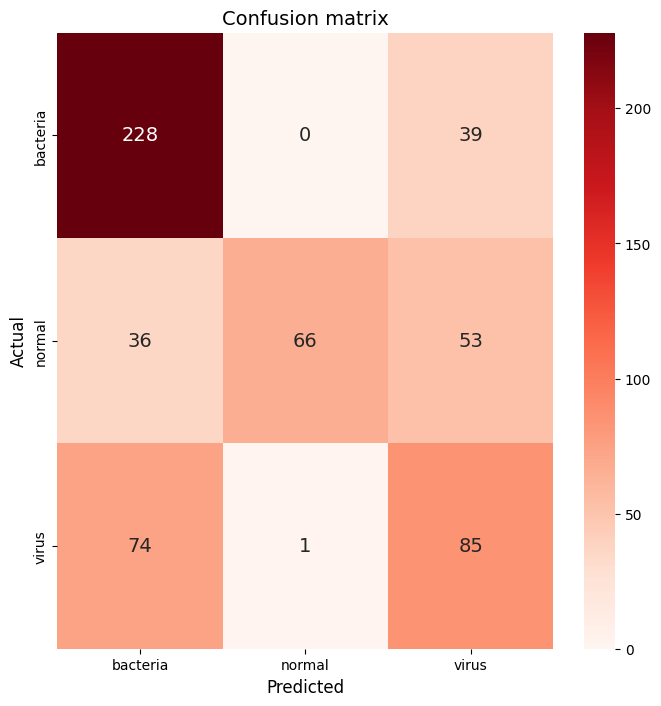

In [167]:
import seaborn as sns
labels = ['bacteria','normal','virus']
#confusion matrix
y_pred = model.predict(x_test)
#transforming label back to original
y_pred = encoder.inverse_transform(y_pred)
#matrix of Actual vs Prediction data
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
plt.title('Confusion matrix',fontsize=14)
sns.heatmap(
  c_matrix, xticklabels=labels,yticklabels=labels,
  fmt='d', annot=True,annot_kws={"size": 14}, cmap='Reds')
plt.xlabel("Predicted",fontsize=12)
plt.ylabel("Actual",fontsize=12)
plt.show()

In [155]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1.0/255,
#                                    samplewise_center=True,
#                                    samplewise_std_normalization=True,
#                                    zoom_range = 0.2, 
#                                    width_shift_range=0.1,  
#                                    height_shift_range=0.1)

# validation_datagen  = ImageDataGenerator(rescale = 1.0/255,
#                                          samplewise_center=True,
#                                          samplewise_std_normalization=True,
#                                          zoom_range = 0.2, 
#                                          width_shift_range=0.1,  
#                                          height_shift_range=0.1)

# test_datagen  = ImageDataGenerator(rescale = 1.0/255,
#                                     samplewise_center=True,
#                                     samplewise_std_normalization=True)

# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                     batch_size=16,
#                                                     class_mode='binary',
#                                                     target_size=(160, 160))

# validation_generator = validation_datagen.flow_from_directory(validation_dir,
#                                                               batch_size=16,
#                                                               class_mode='binary',
#                                                               target_size=(160, 160))

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   class_mode='binary',
#                                                   target_size=(160, 160))

In [156]:
# import tensorflow as tf
# from tensorflow.keras import layers

# model = tf.keras.Sequential(name='X-ray_CNN')

# model.add(tf.keras.layers.InputLayer(input_shape=(160,160,3)))

# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('relu')) # relu activation makes each value 0 if it is negative
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=512, activation='relu'))
# model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# METRICS = ['accuracy',
#         tf.keras.metrics.Precision(name='precision'),
#         tf.keras.metrics.Recall(name='recall')]
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-2,
#     decay_steps=10000,
#     decay_rate=0.9)
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=METRICS)
# history = model.fit(train_generator, 
#           steps_per_epoch= n_train//16,
#           validation_data=validation_generator,
#           epochs=20,
#           verbose=1)
# model.summary()

In [163]:
import datetime
model.save('xraymodel_tertiary_'+str(datetime.datetime.now().strftime("%Y%m%d_%H%M%S")))

INFO:tensorflow:Assets written to: xraymodel_tertiary_20221130_120158\assets


INFO:tensorflow:Assets written to: xraymodel_tertiary_20221130_120158\assets


In [ ]:
# import tensorflow as tf
# model = tf.keras.models.load_model('second_model')

In [160]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion(n, generator, title, batch_size):
    labels = []
    for i in range(0, n//batch_size):
        # print(i)
        labels.extend(generator[i][1])
    labels = np.array(labels)
    print(len(labels))
    # preds = model.predict_classes(generator)
    preds = (model.predict(generator) > 0.5).astype("int32")
    preds = np.reshape(preds, n)

    cm  = confusion_matrix(labels, preds[:len(labels)])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=False,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
    plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
    plt.title(title, fontsize=20)
    return plt.show()

plot_confusion(n_test, test_generator, 'Test set', batch_size)
plot_confusion(n_train, train_generator, 'Training set', 16)
plot_confusion(n_validation, validation_generator, 'Validation set', 16)

# 0.973958 accuracy for test

576
19/19 [==============================] - 5s 264ms/step


ValueError: cannot reshape array of size 1746 into shape (582,)